In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# This is only a dataset I am using. This is not taught on their website.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

In [234]:
X = df[["FUELCONSUMPTION_COMB_MPG"]]
y = df[["CO2EMISSIONS"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_Train, y_train)

kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
MSE_PER_FOLD = -cross_val_score(model, X_train, y_train, cv = kf, scoring = "neg_mean_squared_error")
average_MSE = MSE_PER_FOLD.mean()
RMSE = np.sqrt(average_MSE)
print(f"RMSE with a line: {float(RMSE)}")

coefficient = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Coefficient: {coefficient} with intercept: {intercept}")

RMSE with a line: 26.631658371712867
Coefficient: -7.838808019179656 with intercept: 463.3631726309043


In [235]:
poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)

kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
MSE_PER_FOLD = -cross_val_score(polynomial_model, X_train_poly, y_train, cv = kf, scoring = "neg_mean_squared_error")
average_MSE = MSE_PER_FOLD.mean()
RMSE = np.sqrt(average_MSE)
print(f"RMSE with a curve: {float(RMSE)}")

coefficient_poly = polynomial_model.coef_
intercept_poly = polynomial_model.intercept_
print(f"Coefficients: {coefficient_poly[0]} with intercept: {intercept}")

RMSE with a curve: 24.70718392986782
Coefficients: [-15.07165228   0.12895688] with intercept: 463.3631726309043


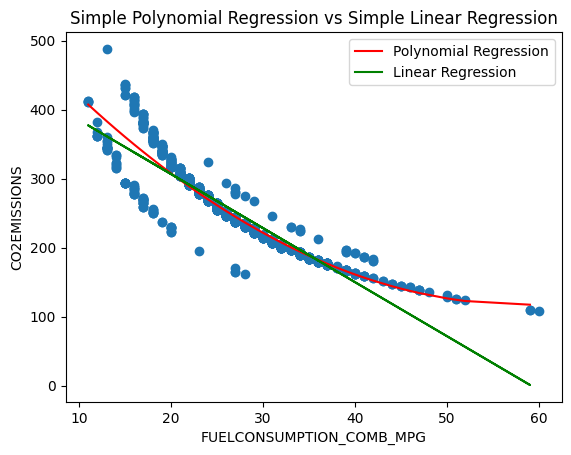

In [245]:
# Side by side comparison. Oi head denny
plt.scatter(df["FUELCONSUMPTION_COMB_MPG"], df["CO2EMISSIONS"])

# Sort X_train and X_train_poly first. Since plt.plot(x,y) plots the points in the order it first sees them.
sorted_idx = np.argsort(X_train.iloc[:, 0])
X_sorted = X_train.iloc[sorted_idx]
X_poly_sorted = X_train_poly[sorted_idx]

# Plot the polynomial curve.
plt.plot(X_sorted, polynomial_model.predict(X_poly_sorted), c = "red", label= "Polynomial Regression")

# Plot the straight line.
plt.plot(X_train, intercept + coefficient * X_train, c = "green", label = "Linear Regression")

plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")
plt.title("Simple Polynomial Regression vs Simple Linear Regression")
plt.legend()
plt.show()